In [6]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [7]:
import plotly.io as pio
pio.renderers.default = "plotly_mimetype+notebook"

# Matplotlib

For this excercise, we have written the following code to load the stock dataset built into plotly express.

In [9]:
stocks = px.data.stocks()
stocks.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


## Question 1: 

Select a stock and create a suitable plot for it. Make sure the plot is readable with relevant information, such as date, values.  

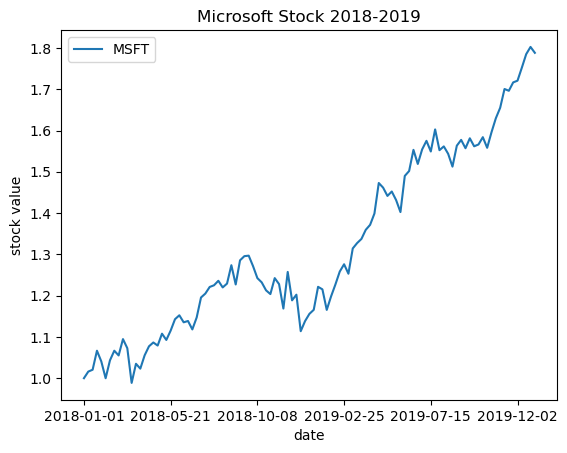

In [74]:
# YOUR CODE HERE
stocks.plot(x='date',y='MSFT')
plt.title('Microsoft Stock 2018-2019')
plt.ylabel('stock value')
plt.show()

## Question 2: 

You've already plot data from one stock. It is possible to plot multiples of them to support comparison.  
To highlight different lines, customise line styles, markers, colors and include a legend to the plot.

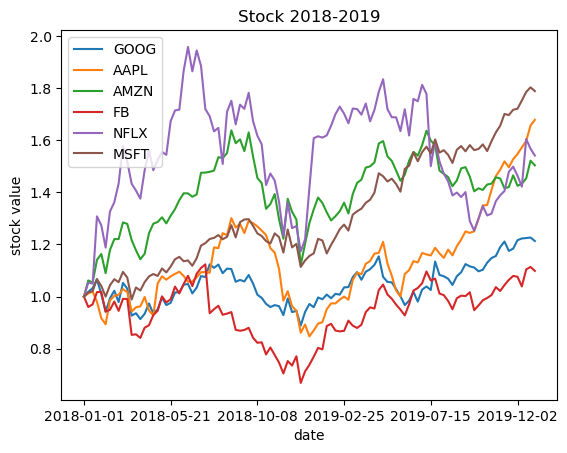

In [11]:
stocks.plot(x='date', y=['GOOG','AAPL', 'AMZN','FB', 'NFLX', 'MSFT'])
plt.title('Stock 2018-2019')
plt.ylabel('stock value')
plt.show()

# Seaborn

First, load the [tips](https://github.com/mwaskom/seaborn-data/blob/master/tips.csv) dataset

In [12]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Question 3:

Let's explore this dataset. Pose a question and create a plot that support drawing answers for your question.

Some possible questions:
- Are there differences between male and female when it comes to giving tips?
- What attribute correlate the most with tip?

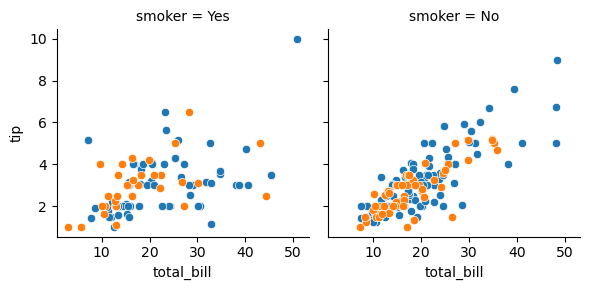

In [73]:
# Question: which group shows the tendency to give more tip? Smokers or Non-smokers?
g = sns.FacetGrid(tips, col='smoker', hue='sex')
g.map(sns.scatterplot, 'total_bill', 'tip')
plt.savefig('smoker.png', dpi=300)
plt.show()

# Answer: Non-smokers

# Plotly Express

## Question 4:

Redo the above exercises (challenges 2 & 3) with plotly express. Create diagrams which you can interact with.




### The stocks dataset

*Hints*:
- Turn stocks dataframe into a structure that can be picked up easily with plotly express

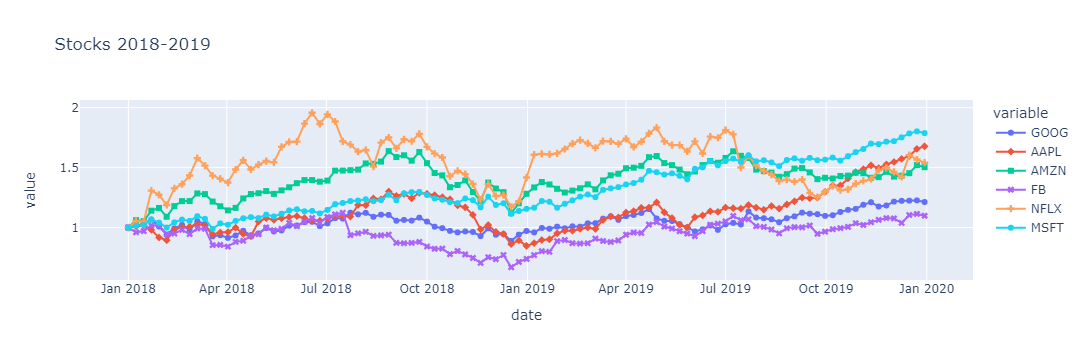

In [80]:
# YOUR CODE HERE -> markers belum diganti based on line
df = px.data.stocks() 
fig = px.line(df, x='date', y=['GOOG','AAPL', 'AMZN','FB', 'NFLX', 'MSFT'], markers=True, symbol='variable', title='Stocks 2018-2019')
fig.update_traces(marker_symbol = 6, selector = dict(type='tirangle-left'))


fig.show()

### The tips dataset

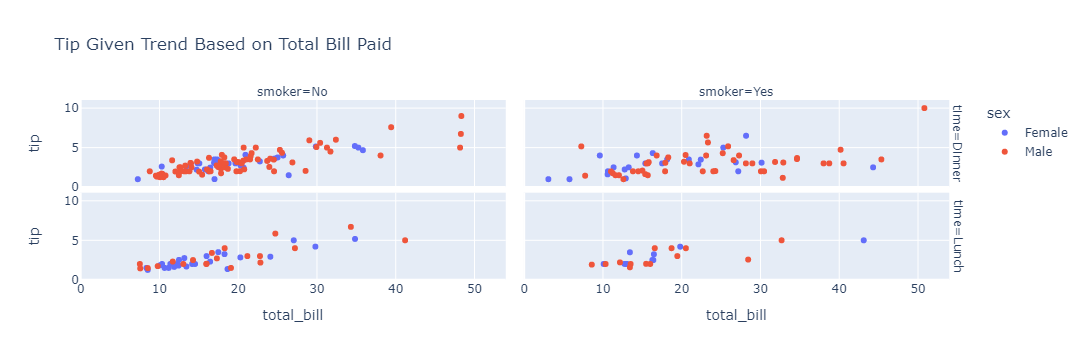

In [16]:
# YOUR CODE HERE
df = px.data.tips() 
fig = px.scatter(df, x='total_bill', y='tip', title='Tip Given Trend Based on Total Bill Paid', color='sex', facet_col='smoker', facet_row='time')
fig.show()


## Question 5:

Recreate the barplot below that shows the population of different continents for the year 2007. 

*Hints:*

- Extract the 2007 year data from the dataframe. You have to process the data accordingly
- use [plotly bar](https://plotly.com/python-api-reference/generated/plotly.express.bar)
- Add different colors for different continents
- Sort the order of the continent for the visualisation. Use [axis layout setting](https://plotly.com/python/reference/layout/xaxis/)
- Add text to each bar that represents the population 

In [17]:
#load data
df = px.data.gapminder()
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


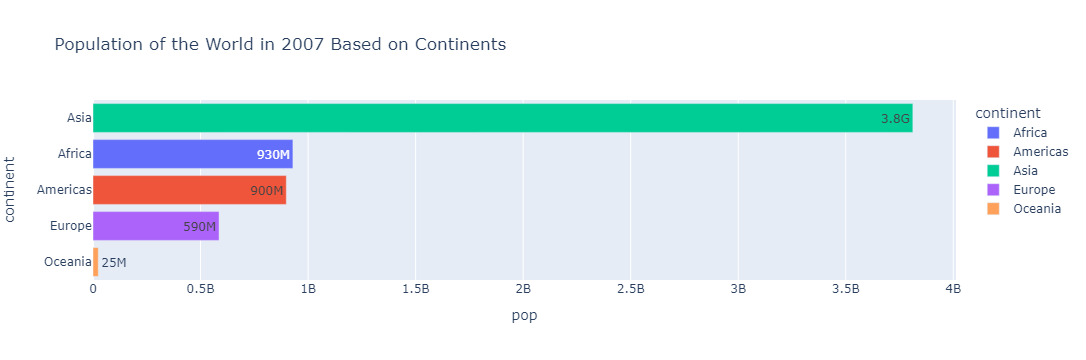

In [78]:
# Extract data
df = px.data.gapminder()
df_2007 = df.query('year==2007')
df_2007_new = df_2007.groupby('continent').sum()

# Use plotly bar
fig = px.bar(df_2007_new,  x="pop", y=df_2007_new.index, orientation='h', color= df_2007_new.index, 
    text_auto='.2s', title='Population of the World in 2007 Based on Continents' 
    )
fig.update_yaxes(categoryorder='max ascending')

fig.show()